In [ ]:
# Mount the dataset to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install the xgboost module
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import the required Libraries

In [ ]:
# Import the required libraries for ML algorithms
import imblearn
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
# Import accuracy metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, plot_confusion_matrix

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the required libraries for CNN
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Data visualisation

In [ ]:
# Create a class to change hyperparameters of CNN training
class Args():

  def __init__(self):
    
    self.data_path = "/content/drive/MyDrive/creditcard.csv"
    self.random_state = 0
    self.test_size = 0.2
    self.batch_size = 2048
    self.epochs = 35

In [ ]:
args = Args()

In [ ]:
# Read the dataset
df = pd.read_csv(args.data_path)

In [ ]:
# Separate the features and labels from the dataframe
X = np.array(df.drop(columns = ["Time", "Amount", "Class"]))
y = np.array(df["Class"])

In [ ]:
# y_1 represents number of fraudulent transactions
y_1 = np.sum(y)

# y_0 represents number of non-fraudulent transactions
y_0 = y.shape[0] - y_1
print(y_1)
print(y_0)

492
284315


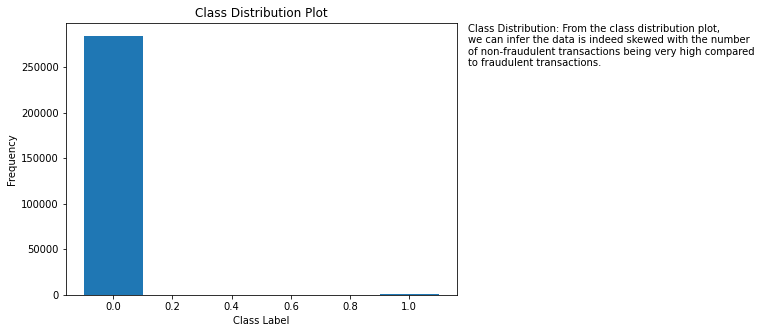

In [ ]:
# Plot the Class distribution of dataset
plt.figure(figsize = (7, 5))
plt.bar([0, 1], [y_0, y_1], width = 0.2)
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Class Distribution Plot")
plt.text(1.2, 251000, "Class Distribution: From the class distribution plot,\nwe can infer the data is indeed skewed with the number\nof non-fraudulent transactions being very high compared\nto fraudulent transactions.")
plt.show()

Class Distribution: From the class distribution plot, we can infer the data is indeed skewed with the number of non-fraudulent transactions being very high compared to fraudulent transactions.

[0 1 2 3 4 5]


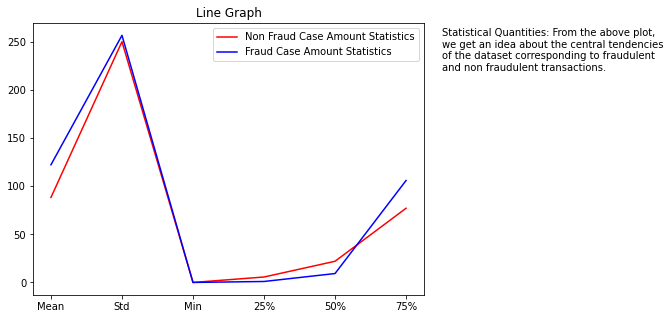

In [ ]:
# Plot several statistical quantities of the dataset
plt.figure(figsize = (7, 5))
non_fraud = np.array(df[df["Class"] == 0].describe()["Amount"].drop(["count", "max"]))
fraud = np.array(df[df["Class"] == 1].describe()["Amount"].drop(["count", "max"]))
x_labels = np.array([i for i in range(non_fraud.shape[0])])
print(x_labels)
my_xticks = ['Mean','Std','Min','25%', '50%', '75%']
plt.xticks(x_labels, my_xticks)
plt.plot(x_labels, non_fraud, c = "r", label = "Non Fraud Case Amount Statistics")
plt.plot(x_labels, fraud, c = "b", label = "Fraud Case Amount Statistics")
plt.title("Line Graph")
plt.text(5.5, 220,"Statistical Quantities: From the above plot,\nwe get an idea about the central tendencies\nof the dataset corresponding to fraudulent\nand non fraudulent transactions.")
plt.legend()
plt.show()

Statistical Quantities: From the above plot, we get an idea about the central tendencies of the dataset corresponding to fraudulent and non fraudulent transactions.


# No Data Balancing

In [ ]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = args.random_state, test_size = args.test_size)

# Data Balancing

In [ ]:
# Implement data balancing using SMOTE
oversample = SMOTE(sampling_strategy = 0.1)
X_balanced, y_balanced = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X_balanced, y_balanced, random_state = args.random_state, test_size = args.test_size)

In [ ]:
# Function to compute the evaluation metrics given the predicted and true labels
def compute_metrics(preds, true):
    
  accuracy = accuracy_score(true, preds)
  precision = precision_score(true, preds)
  f1 = f1_score(true, preds)
  recall = recall_score(true, preds)
  roc_auc = roc_auc_score(true, preds)
  prc = precision_recall_curve(true, preds)

  return accuracy, precision, recall, f1, roc_auc, prc

# Decision Tree Classifier

The training metrics are: 
	Accuracy:  0.9857, Precision:  0.9905, Recall:  0.8518, F1:  0.9159

The test metrics are: 
	Accuracy:  0.9846, Precision:  0.9901, Recall:  0.8364, F1:  0.9068



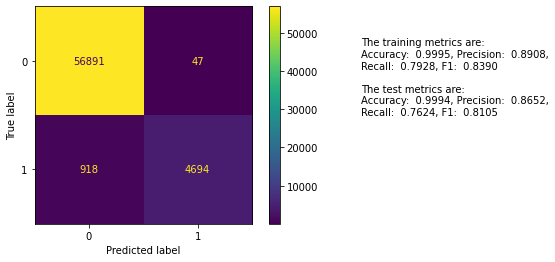

In [ ]:
# Fit the decision tree classifier and evaluate
decision_tree = DecisionTreeClassifier(max_depth = 4, random_state = args.random_state, criterion = "entropy")
decision_tree.fit(x_train, y_train)
train_preds = decision_tree.predict(x_train)
test_preds = decision_tree.predict(x_test)

train_accuracy, train_precision, train_recall, train_f1, train_roc, train_prc = compute_metrics(train_preds, y_train)
test_accuracy, test_precision, test_recall, test_f1, test_roc, test_prc = compute_metrics(test_preds, y_test)

print("The training metrics are: ")
print(f"\tAccuracy: {train_accuracy: .4f}, Precision: {train_precision: .4f}, Recall: {train_recall: .4f}, F1: {train_f1: .4f}\n")
print("The test metrics are: ")
print(f"\tAccuracy: {test_accuracy: .4f}, Precision: {test_precision: .4f}, Recall: {test_recall: .4f}, F1: {test_f1: .4f}\n")

plot_confusion_matrix(decision_tree, x_test, y_test)
plt.text(2.5,0.5,"The training metrics are:\nAccuracy:  0.9995, Precision:  0.8908,\nRecall:  0.7928, F1:  0.8390\n\nThe test metrics are:\nAccuracy:  0.9994, Precision:  0.8652,\nRecall:  0.7624, F1:  0.8105")
plt.show()

In [ ]:
import pickle
file_name = "decision_tree_balanced.pkl"
with open(file_name, "wb") as file:
    pickle.dump(decision_tree, file)

# K Nearest Neighbours

The training metrics are: 
	Accuracy:  0.9991, Precision:  0.9900, Recall:  0.9998, F1:  0.9949

The test metrics are: 
	Accuracy:  0.9989, Precision:  0.9887, Recall:  0.9993, F1:  0.9940



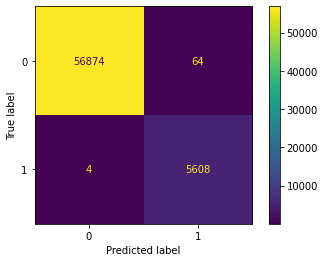

In [ ]:
# Fit the K nearest neighbours classifier and evaluate
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
train_preds = knn.predict(x_train)
test_preds = knn.predict(x_test)

train_accuracy, train_precision, train_recall, train_f1, train_roc, train_prc = compute_metrics(train_preds, y_train)
test_accuracy, test_precision, test_recall, test_f1, test_roc, test_prc = compute_metrics(test_preds, y_test)

print("The training metrics are: ")
print(f"\tAccuracy: {train_accuracy: .4f}, Precision: {train_precision: .4f}, Recall: {train_recall: .4f}, F1: {train_f1: .4f}\n")
print("The test metrics are: ")
print(f"\tAccuracy: {test_accuracy: .4f}, Precision: {test_precision: .4f}, Recall: {test_recall: .4f}, F1: {test_f1: .4f}\n")

plot_confusion_matrix(knn, x_test, y_test)
plt.show()

In [ ]:
import pickle
file_name = "knn_balanced.pkl"
with open(file_name, "wb") as file:
    pickle.dump(knn, file)

# Support Vector Machines

The training metrics are: 
	Accuracy:  0.9913, Precision:  0.9911, Recall:  0.9128, F1:  0.9503

The test metrics are: 
	Accuracy:  0.9914, Precision:  0.9900, Recall:  0.9138, F1:  0.9503



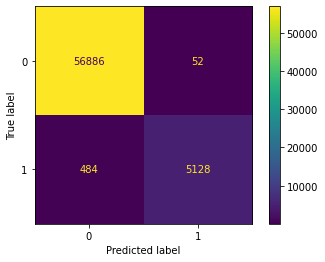

In [ ]:
# Fit the support vector machines classifier and evaluate
svm = SVC(random_state = args.random_state)
svm.fit(x_train, y_train)
train_preds = svm.predict(x_train)
test_preds = svm.predict(x_test)

train_accuracy, train_precision, train_recall, train_f1, train_roc, train_prc = compute_metrics(train_preds, y_train)
test_accuracy, test_precision, test_recall, test_f1, test_roc, test_prc = compute_metrics(test_preds, y_test)

print("The training metrics are: ")
print(f"\tAccuracy: {train_accuracy: .4f}, Precision: {train_precision: .4f}, Recall: {train_recall: .4f}, F1: {train_f1: .4f}\n")
print("The test metrics are: ")
print(f"\tAccuracy: {test_accuracy: .4f}, Precision: {test_precision: .4f}, Recall: {test_recall: .4f}, F1: {test_f1: .4f}\n")
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

In [ ]:
import pickle
file_name = "svm_balanced.pkl"
with open(file_name, "wb") as file:
    pickle.dump(svm, file)

# Random Forest Classifier

The training metrics are: 
	Accuracy:  1.0000, Precision:  1.0000, Recall:  1.0000, F1:  1.0000

The test metrics are: 
	Accuracy:  0.9986, Precision:  0.9977, Recall:  0.9870, F1:  0.9923



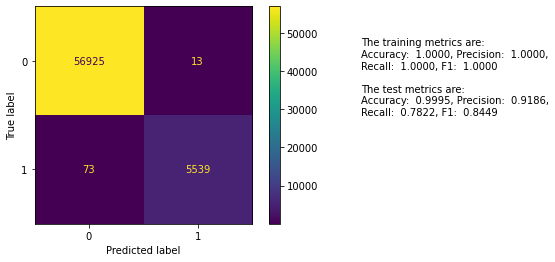

In [ ]:
# Fit the random forest classifier and evaluate
rfc = RandomForestClassifier(random_state = args.random_state)
rfc.fit(x_train, y_train)
train_preds = rfc.predict(x_train)
test_preds = rfc.predict(x_test)

train_accuracy, train_precision, train_recall, train_f1, train_roc, train_prc = compute_metrics(train_preds, y_train)
test_accuracy, test_precision, test_recall, test_f1, test_roc, test_prc = compute_metrics(test_preds, y_test)

print("The training metrics are: ")
print(f"\tAccuracy: {train_accuracy: .4f}, Precision: {train_precision: .4f}, Recall: {train_recall: .4f}, F1: {train_f1: .4f}\n")
print("The test metrics are: ")
print(f"\tAccuracy: {test_accuracy: .4f}, Precision: {test_precision: .4f}, Recall: {test_recall: .4f}, F1: {test_f1: .4f}\n")

plot_confusion_matrix(rfc, x_test, y_test)
plt.text(2.5,0.5,"The training metrics are:\nAccuracy:  1.0000, Precision:  1.0000,\nRecall:  1.0000, F1:  1.0000\n\nThe test metrics are:\nAccuracy:  0.9995, Precision:  0.9186,\nRecall:  0.7822, F1:  0.8449")
plt.show()

In [ ]:
import pickle
file_name = "rfc_balanced.pkl"
with open(file_name, "wb") as file:
    pickle.dump(rfc, file)

# Logistic Regression

The training metrics are: 
	Accuracy:  0.9855, Precision:  0.9774, Recall:  0.8610, F1:  0.9155

The test metrics are: 
	Accuracy:  0.9857, Precision:  0.9766, Recall:  0.8614, F1:  0.9154



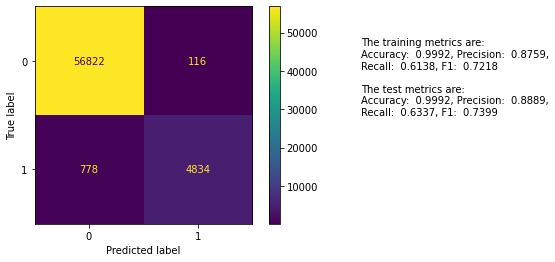

In [ ]:
# Fit the logistic regression classifier and evaluate
lr = LogisticRegression(C = 0.55)
lr.fit(x_train, y_train)
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

train_accuracy, train_precision, train_recall, train_f1, train_roc, train_prc = compute_metrics(train_preds, y_train)
test_accuracy, test_precision, test_recall, test_f1, test_roc, test_prc = compute_metrics(test_preds, y_test)

print("The training metrics are: ")
print(f"\tAccuracy: {train_accuracy: .4f}, Precision: {train_precision: .4f}, Recall: {train_recall: .4f}, F1: {train_f1: .4f}\n")
print("The test metrics are: ")
print(f"\tAccuracy: {test_accuracy: .4f}, Precision: {test_precision: .4f}, Recall: {test_recall: .4f}, F1: {test_f1: .4f}\n")

plot_confusion_matrix(lr, x_test, y_test)
plt.text(2.5,0.5,"The training metrics are:\nAccuracy:  0.9992, Precision:  0.8759,\nRecall:  0.6138, F1:  0.7218\n\nThe test metrics are:\nAccuracy:  0.9992, Precision:  0.8889,\nRecall:  0.6337, F1:  0.7399")
plt.show()

In [ ]:
import pickle
file_name = "lr_balanced.pkl"
with open(file_name, "wb") as file:
    pickle.dump(lr, file)

# XGBoost Classifier

The training metrics are: 
	Accuracy:  0.9888, Precision:  0.9887, Recall:  0.8875, F1:  0.9353

The test metrics are: 
	Accuracy:  0.9890, Precision:  0.9891, Recall:  0.8870, F1:  0.9353



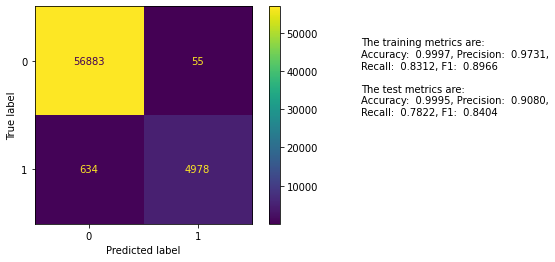

In [ ]:
# Fit the xgboost classifier and evaluate

xgb = XGBClassifier(random_state = args.random_state)
xgb.fit(x_train, y_train)
train_preds = xgb.predict(x_train)
test_preds = xgb.predict(x_test)

train_accuracy, train_precision, train_recall, train_f1, train_roc, train_prc = compute_metrics(train_preds, y_train)
test_accuracy, test_precision, test_recall, test_f1, test_roc, test_prc = compute_metrics(test_preds, y_test)

print("The training metrics are: ")
print(f"\tAccuracy: {train_accuracy: .4f}, Precision: {train_precision: .4f}, Recall: {train_recall: .4f}, F1: {train_f1: .4f}\n")
print("The test metrics are: ")
print(f"\tAccuracy: {test_accuracy: .4f}, Precision: {test_precision: .4f}, Recall: {test_recall: .4f}, F1: {test_f1: .4f}\n")

plot_confusion_matrix(xgb, x_test, y_test)
plt.text(2.5,0.5,"The training metrics are:\nAccuracy:  0.9997, Precision:  0.9731,\nRecall:  0.8312, F1:  0.8966\n\nThe test metrics are:\nAccuracy:  0.9995, Precision:  0.9080,\nRecall:  0.7822, F1:  0.8404")
plt.show()

In [ ]:
import pickle
file_name = "xgb_balanced.pkl"
with open(file_name, "wb") as file:
    pickle.dump(xgb, file)

# Prepare the dataloader for torch model training

In [ ]:
# Prepare the training dataloader
train_dataset = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
trainloader = DataLoader(train_dataset, batch_size = args.batch_size)

In [ ]:
# Prepare the test dataloader
test_dataset = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))
testloader = DataLoader(test_dataset, batch_size = args.batch_size)


---



# Baseline Convolutional Neural Networks


In [ ]:
# Baseline CNN Class following the architecture mentioned in the paper
class BaselineCNN(nn.Module):
  def __init__(self):
    super(BaselineCNN, self).__init__()

    self.conv1 = nn.Conv1d(1, 32, 2)
    self.bn1 = nn.BatchNorm1d(32)
    self.dropout1 = nn.Dropout(0.2)

    self.conv2 = nn.Conv1d(32, 64, 2)
    self.bn2 = nn.BatchNorm1d(64)
    self.dropout2 = nn.Dropout(0.2)

    self.dense = nn.Linear(1664, 64)
    self.dropout3 = nn.Dropout(0.5)
    self.dense1 = nn.Linear(64, 1)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  # Forward propagation given an input
  def forward(self, x):
      x = self.dropout1(self.bn1(self.relu(self.conv1(x))))
      x = self.dropout2(self.bn2(self.relu(self.conv2(x))))
      x = torch.flatten(x, start_dim = 1)
      x = self.relu(self.dense(x))
      x = self.dropout3(x)
      x = self.dense1(x)
      x = self.sigmoid(x)
      return x

In [ ]:
# CNN Class with 14 layers following the architecture mentioned in the paper
class CNN14(nn.Module):
    def __init__(self):
        super(CNN14, self).__init__()

        self.conv1 = nn.Conv1d(1, 32, 2)
        self.bn1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(0.2)
        
        self.conv2 = nn.Conv1d(32, 64, 2)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)
        
        self.dense = nn.Linear(1664, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.dense1 = nn.Linear(64, 100)
        self.dense2 = nn.Linear(100, 50)
        self.dense3 = nn.Linear(50, 25)

        self.cls = nn.Linear(25, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        x = self.dropout1(self.bn1(self.relu(self.conv1(x))))
        x = self.dropout2(self.bn2(self.relu(self.conv2(x))))
        x = torch.flatten(x, start_dim = 1)
        x = self.relu(self.dense(x))
        x = self.dropout3(x)
        x = self.relu(self.dense1(x))
        x = self.relu(self.dense2(x))
        x = self.relu(self.dense3(x))
        x = self.sigmoid(self.cls(x))

        return x

In [ ]:
# CNN Class with 17 layers following the architecture mentioned in the paper
class CNN17(nn.Module):
    def __init__(self):
        super(CNN17, self).__init__()

        self.conv1 = nn.Conv1d(1, 32, 2)
        self.bn1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv1d(32, 64, 2)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)

        self.conv3 = nn.Conv1d(64, 64, 2)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.25)

        self.dense = nn.Linear(1600, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.dense1 = nn.Linear(64, 100)
        self.dense2 = nn.Linear(100, 50)
        self.dense3 = nn.Linear(50, 25)

        self.cls = nn.Linear(25, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        x = self.dropout1(self.bn1(self.relu(self.conv1(x))))
        x = self.dropout2(self.bn2(self.relu(self.conv2(x))))
        x = self.dropout3(self.bn3(self.relu(self.conv3(x))))
        x = torch.flatten(x, start_dim = 1)
        x = self.relu(self.dense(x))
        x = self.dropout3(x)
        x = self.relu(self.dense1(x))
        x = self.relu(self.dense2(x))
        x = self.relu(self.dense3(x))
        x = self.sigmoid(self.cls(x))

        return x

In [ ]:
# CNN Class with 20 layers following the architecture mentioned in the paper
class CNN20(nn.Module):
    def __init__(self):
        super(CNN20, self).__init__()

        self.conv1 = nn.Conv1d(1, 32, 2)
        self.bn1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv1d(32, 64, 2)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)

        self.conv3 = nn.Conv1d(64, 64, 2)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.5)

        self.conv4 = nn.Conv1d(64, 64, 2)
        self.bn4 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.25)

        self.dense = nn.Linear(1536, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.dense1 = nn.Linear(64, 100)
        self.dense2 = nn.Linear(100, 50)
        self.dense3 = nn.Linear(50, 25)

        self.cls = nn.Linear(25, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        x = self.dropout1(self.bn1(self.relu(self.conv1(x))))
        x = self.dropout2(self.bn2(self.relu(self.conv2(x))))
        x = self.dropout3(self.bn3(self.relu(self.conv3(x))))
        x = self.dropout4(self.bn4(self.relu(self.conv4(x))))
        x = torch.flatten(x, start_dim = 1)
        x = self.relu(self.dense(x))
        x = self.dropout3(x)
        x = self.relu(self.dense1(x))
        x = self.relu(self.dense2(x))
        x = self.relu(self.dense3(x))
        x = self.sigmoid(self.cls(x))

        return x

# Train the models

In [ ]:
# Initialise the model
# model = BaselineCNN()
model = CNN14()
# model = CNN17()
# model = CNN20()

In [ ]:
# Set the criterion or loss function
criterion = nn.BCELoss()

# Initialise the optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

# Set the device to gpu
device = "cuda"

In [ ]:
# Save the model in the device
model.to(device)

CNN14(
  (conv1): Conv1d(1, 32, kernel_size=(2,), stride=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv2): Conv1d(32, 64, kernel_size=(2,), stride=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (dense): Linear(in_features=1664, out_features=64, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (dense1): Linear(in_features=64, out_features=100, bias=True)
  (dense2): Linear(in_features=100, out_features=50, bias=True)
  (dense3): Linear(in_features=50, out_features=25, bias=True)
  (cls): Linear(in_features=25, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [ ]:
# Evaluate a CNN model on training set
def train_evaluate(model):

    running_loss = 0.0
    preds = []
    true = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward propagation
        outputs = model(inputs.unsqueeze(1).float().to(device))
        loss = criterion(outputs.squeeze(), labels.squeeze().float().to(device))

        pred = outputs.detach().cpu().numpy()
        pred[pred >= 0.5] = 1
        pred[pred < 0.5] = 0
        pred = list(pred.reshape(pred.shape[0])) #

        preds.extend(pred)
        true.extend(labels.detach().cpu().numpy())

        running_loss += loss.item()

    running_loss /= i

    preds = np.array(preds)
    true = np.array(true)
    train_accuracy, train_precision, train_recall, train_f1, train_roc, train_prc = compute_metrics(preds, true)

    print('Finished evaluation')
    print("The training metrics are: ")
    print(f"\tAccuracy: {train_accuracy: .4f}, Precision: {train_precision: .4f}, Recall: {train_recall: .4f}, F1: {train_f1: .4f}\n")

    return train_accuracy, train_precision, train_recall, train_f1, running_loss

In [ ]:
# Evaluate a CNN model on the test set
def test_evaluate(model):

    running_loss = 0.0
    preds = []
    true = []
    for i, data in enumerate(testloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward propagation
        outputs = model(inputs.unsqueeze(1).float().to(device))
        loss = criterion(outputs.squeeze(), labels.squeeze().float().to(device))

        pred = outputs.detach().cpu().numpy()
        pred[pred >= 0.5] = 1
        pred[pred < 0.5] = 0
        pred = list(pred.reshape(pred.shape[0]))

        preds.extend(pred)
        true.extend(labels.detach().cpu().numpy())

        running_loss += loss.item()

    running_loss /= (i+1)

    preds = np.array(preds)
    true = np.array(true)
    test_accuracy, test_precision, test_recall, test_f1, test_roc, test_prc = compute_metrics(preds, true)

    print('Finished evaluation')
    print("The test metrics are: ")
    print(f"\tAccuracy: {test_accuracy: .4f}, Precision: {test_precision: .4f}, Recall: {test_recall: .4f}, F1: {test_f1: .4f}\n")

    return test_accuracy, test_precision, test_recall, test_f1, running_loss

In [ ]:
# Train a CNN model
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
train_recalls, test_recalls = [], []
train_precisions, test_precisions = [], []
train_f1s, test_f1s = [], []

epoch_list = []

model.train()
for epoch in tqdm(range(args.epochs), position = 0, leave = True):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), position = 0, leave = True):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs.unsqueeze(1).float().to(device))
        loss = criterion(outputs.squeeze(), labels.squeeze().float().to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % 15 == 0:    # print every 15 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        #     running_loss = 0.0

    train_accuracy, train_precision, train_recall, train_f1, train_loss = train_evaluate(model)
    test_accuracy, test_precision, test_recall, test_f1, test_loss = test_evaluate(model)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)

    train_f1s.append(train_f1)
    test_f1s.append(test_f1)

    epoch_list.append(epoch + 1)

print('Finished Training')

112it [00:02, 38.20it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



  3%|▎         | 1/35 [00:07<04:07,  7.28s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 46.22it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



  6%|▌         | 2/35 [00:12<03:21,  6.10s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.17it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



  9%|▊         | 3/35 [00:18<03:05,  5.80s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.04it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 11%|█▏        | 4/35 [00:23<02:54,  5.64s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.91it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 14%|█▍        | 5/35 [00:28<02:47,  5.57s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.95it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 17%|█▋        | 6/35 [00:34<02:39,  5.49s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.53it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 20%|██        | 7/35 [00:39<02:33,  5.47s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.89it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 23%|██▎       | 8/35 [00:44<02:27,  5.45s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 46.17it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 26%|██▌       | 9/35 [00:50<02:20,  5.41s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.70it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 29%|██▊       | 10/35 [00:55<02:15,  5.42s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.12it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 31%|███▏      | 11/35 [01:01<02:10,  5.43s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.27it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 34%|███▍      | 12/35 [01:07<02:13,  5.80s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.61it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 37%|███▋      | 13/35 [01:13<02:05,  5.68s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.52it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 40%|████      | 14/35 [01:18<01:57,  5.61s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.51it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 43%|████▎     | 15/35 [01:24<01:51,  5.55s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 43.82it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 46%|████▌     | 16/35 [01:29<01:44,  5.52s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.77it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 49%|████▊     | 17/35 [01:35<01:38,  5.49s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 46.03it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 51%|█████▏    | 18/35 [01:40<01:32,  5.45s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.22it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 54%|█████▍    | 19/35 [01:45<01:27,  5.46s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.04it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 57%|█████▋    | 20/35 [01:51<01:24,  5.62s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 43.60it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 60%|██████    | 21/35 [01:57<01:18,  5.60s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.27it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 63%|██████▎   | 22/35 [02:02<01:12,  5.54s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.79it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 66%|██████▌   | 23/35 [02:08<01:07,  5.66s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.67it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 69%|██████▊   | 24/35 [02:14<01:01,  5.58s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.34it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 71%|███████▏  | 25/35 [02:19<00:55,  5.53s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.08it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 74%|███████▍  | 26/35 [02:24<00:49,  5.49s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.16it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 77%|███████▋  | 27/35 [02:30<00:43,  5.45s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 46.24it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 80%|████████  | 28/35 [02:35<00:37,  5.41s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.65it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 83%|████████▎ | 29/35 [02:41<00:32,  5.42s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.08it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 86%|████████▌ | 30/35 [02:46<00:26,  5.39s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.10it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 89%|████████▊ | 31/35 [02:51<00:21,  5.40s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.25it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 91%|█████████▏| 32/35 [02:57<00:16,  5.39s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 45.84it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 94%|█████████▍| 33/35 [03:02<00:10,  5.38s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 44.54it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



 97%|█████████▋| 34/35 [03:07<00:05,  5.40s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



112it [00:02, 43.95it/s]


Finished evaluation
The training metrics are: 
	Accuracy:  0.9983, Precision:  0.0000, Recall:  0.0000, F1:  0.0000



100%|██████████| 35/35 [03:13<00:00,  5.53s/it]

Finished evaluation
The test metrics are: 
	Accuracy:  0.9982, Precision:  0.0000, Recall:  0.0000, F1:  0.0000

Finished Training


In [ ]:
torch.save(model.to("cpu"), "cnn14_unbalanced.pt")

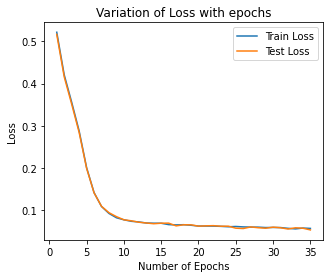

In [ ]:
# Plot loss variation with epochs
plt.figure(figsize = (5, 4))
plt.plot(epoch_list, train_losses, label = "Train Loss")
plt.plot(epoch_list, test_losses, label = "Test Loss")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Variation of Loss with epochs")
plt.show()

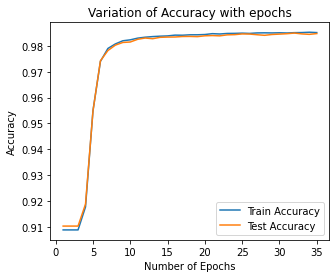

In [ ]:
# Plot accuracy variation with epochs
plt.figure(figsize = (5, 4))
plt.plot(epoch_list, train_accuracies, label = "Train Accuracy")
plt.plot(epoch_list, test_accuracies, label = "Test Accuracy")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy with epochs")
plt.show()

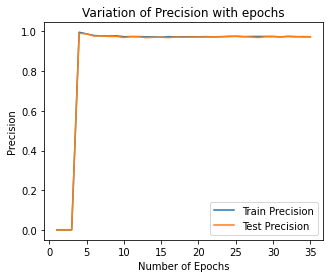

In [ ]:
# Plot precision variation with epochs
plt.figure(figsize = (5, 4))
plt.plot(epoch_list, train_precisions, label = "Train Precision")
plt.plot(epoch_list, test_precisions, label = "Test Precision")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Precision")
plt.title("Variation of Precision with epochs")
plt.show()

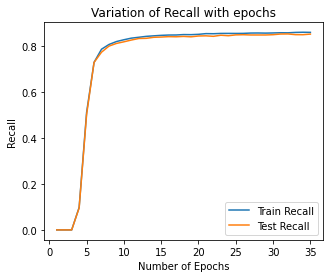

In [ ]:
# Plot recall variation with epochs
plt.figure(figsize = (5, 4))
plt.plot(epoch_list, train_recalls, label = "Train Recall")
plt.plot(epoch_list, test_recalls, label = "Test Recall")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Recall")
plt.title("Variation of Recall with epochs")
plt.show()

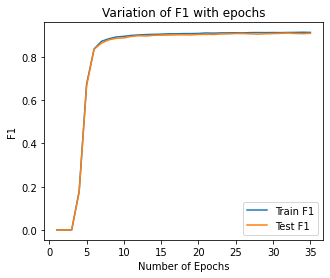

In [ ]:
# Plot f1 variation with epochs
plt.figure(figsize = (5, 4))
plt.plot(epoch_list, train_f1s, label = "Train F1")
plt.plot(epoch_list, test_f1s, label = "Test F1")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("F1")
plt.title("Variation of F1 with epochs")
plt.show()